## Use py27

In [1]:
from __future__ import division
import nltk, re, pprint
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Accessing Text from the Web and from Disk

Check the difference among urllib, urllib2, request [here](http://stackoverflow.com/questions/2018026/what-are-the-differences-between-the-urllib-urllib2-and-requests-module)

In [2]:
from urllib import urlopen

In [3]:
url =  "http://www.gutenberg.org/files/2554/2554.txt"
raw =  urlopen(url).read()
type(raw)

str

In [4]:
len(raw)

1176896

In [5]:
raw[:70]

'The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoev'

In [12]:
tokens =  nltk.word_tokenize(raw)  # a list of words and punctuation
type(tokens)

list

In [13]:
len(tokens)

254352

In [14]:
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

### Creating an NLTK text from this list, we can carry out all of the other linguistic processing

In [9]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

In [15]:
len(text)

254352

In [16]:
text[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [17]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; Nikodim Fomitch; young man; Ilya Petrovitch; n't know;
Project Gutenberg; Dmitri Prokofitch; Andrey Semyonovitch; Hay Market


In [18]:
nltk.FreqDist(text)

FreqDist({'fawn': 1,
          'writings': 1,
          'nunnery': 1,
          'yellow': 27,
          'four': 26,
          'Does': 8,
          'clotted': 1,
          'spiders': 2,
          'hanging': 15,
          'self-reliant': 1,
          'Foundation': 24,
          'Livingstone': 1,
          '_might_': 1,
          'rupture': 7,
          'rouse': 4,
          'Fetch': 1,
          'originality': 1,
          'superficially': 1,
          'unnecessarily': 1,
          'meadows': 1,
          'sinking': 4,
          'impertinent': 1,
          'fogeys': 1,
          'uncertain': 5,
          'stabbed': 5,
          'bringing': 14,
          'disturb': 6,
          'recollections': 2,
          'uttering': 12,
          'prize': 2,
          'buttonhole': 1,
          'protest': 14,
          'persisted': 8,
          's/he': 1,
          'Evidently': 2,
          'specially': 2,
          'tired': 17,
          'railing': 5,
          'pulse': 3,
          'elegant': 2,
    

In [21]:
text.concordance('leather')

Displaying 10 of 10 matches:
rs and a sofa covered with American leather , full of holes , before which stoo
ointed , beaded headdress and thick leather shoes ; she was cracking nuts and l
nd with them a small greasy chamois leather purse with a steel rim and ring . T
with an arched lid covered with red leather and studded with steel nails . The 
dly looked to see ; then four small leather cases . There was a chain , too , m
en he had sunk down on the American leather sofa , which was in even worse cond
 for it 's foreign work and foreign leather ; the secretary of the English Emba
ssian translation . It was bound in leather , old and worn . `` Where did you g
urse off her neck , made of chamois leather ... a purse stuffed full of somethi
r and the room smelt of mice and of leather . He lay in a sort of reverie : one


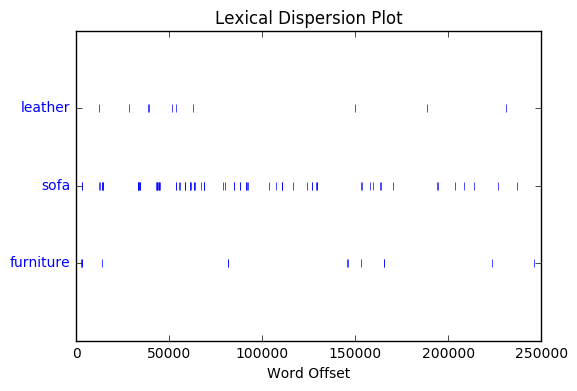

In [25]:
text.dispersion_plot(["leather", "sofa","furniture"])

In [27]:
nltk.FreqDist(text).hapaxes()   # return words only show once

['fawn',
 'writings',
 'nunnery',
 'clotted',
 'self-reliant',
 'increase',
 'Livingstone',
 '_might_',
 'wheeled',
 'originality',
 'superficially',
 '_when',
 'meadows',
 'fogeys',
 'anaemic',
 'Old',
 'buttonhole',
 'straws',
 'busybody',
 'self-abnegation',
 'scraped',
 'errors',
 'cooking',
 'contributed',
 'shocks',
 'specialist',
 'dumbfoundered',
 'Wanderers',
 'china',
 'pretensions',
 'elaborate',
 'N',
 'golden',
 'secluded',
 "'Serves",
 'cherishing',
 'mystic',
 'paperwork',
 'harden',
 'LUZHIN',
 'gashed',
 'morally',
 'sweeter',
 'apoplexy',
 'expressively',
 'vanities',
 'NOTICE',
 'organized',
 'BUT',
 'Waterloo',
 'provincial',
 'travel',
 'drying',
 'feature',
 'Killing',
 'Anatomy',
 'swine',
 'short-tempered',
 'promotion',
 'matter-of-fact',
 'effective',
 'endeavoured',
 'post-haste',
 'fleetingly',
 'presiding',
 "'new",
 'specks',
 'nonsensical',
 '_legal_',
 'govern',
 '_O',
 '_I',
 'fidelity',
 'dreamer',
 'tallow-candle',
 'Hit',
 'maturer',
 'unforeseen',
 

### The find() and rfind() (“reverse find”) methods help us get the right index values to
use for slicing the string

In [37]:
raw.find("PART I")

-1

In [38]:
raw.rfind("End of Project Gutenberg's Crime")

-1

## Dealing with HTML

In [39]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urlopen(url).read()
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [40]:
from bs4 import BeautifulSoup

#raw = nltk.clean_html(html)  # beautifulsoup does a better job
soup = BeautifulSoup(html, "lxml")
raw = soup.get_text()
raw[:70]

u"\n\nBBC NEWS | Health | Blondes 'to die out in 200 years'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n"

In [41]:
tokens = nltk.word_tokenize(raw)
tokens[:10]

[u'BBC',
 u'NEWS',
 u'|',
 u'Health',
 u'|',
 u'Blondes',
 u"'to",
 u'die',
 u'out',
 u'in']

In [42]:
tokens_ = nltk.wordpunct_tokenize(raw)  # nltk.word_tokenize(the_text.translate(None, string.punctuation))
tokens_[:10]

[u'BBC',
 u'NEWS',
 u'|',
 u'Health',
 u'|',
 u'Blondes',
 u"'",
 u'to',
 u'die',
 u'out']

In [43]:
text = nltk.Text(tokens)
text[:10]

[u'BBC',
 u'NEWS',
 u'|',
 u'Health',
 u'|',
 u'Blondes',
 u"'to",
 u'die',
 u'out',
 u'in']

In [44]:
text.collocations()

blonde hair; n't disappear; Health stories; Alien 'abductees;
Alzheimer's Polio; Blondes 'to; Congo Ebola; Country Profiles; Ebola
outbreak; Front Page; Gene defect; Iraq Gene; Jonathan Rees; Middle
East; Polio campaign; South Asia; Talking Point; Vegetables ward; aid
diabetics'; big families


In [45]:
text.concordance('gene')

Displaying 7 of 7 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 


In [48]:
f = open('document.txt', 'rU')  # r tsands for read, U stands for universial
raw = f.read()
raw[:70]

'hey say too few people now carry the gene for blondes to last beyond t'

In [49]:
f = open('document.txt', 'rU')
for line in f:
    print line.strip()  # remove "\n"

hey say too few people now carry the gene for blondes to last beyond the next
blonde hair is caused by a recessive gene . In order for a child to have blond
have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin
er's Polio campaign launched in Iraq Gene defect explains high blood pressure
er's Polio campaign launched in Iraq Gene defect explains high blood pressure
In [46]:


### Examine the current directory

In [50]:
import os
os.listdir('.')

['.ipynb_checkpoints',
 'AnIntroductiontoInformationRetrieval.pdf',
 'Capstone Proposal.ipynb',
 'document.txt',
 'NaturalLanguageProcessingWithPython.pdf',
 'NLP Note Chapter 1.ipynb',
 'NLP Note Chapter 2.ipynb',
 'NLP Note Chapter 3.ipynb',
 'project_report_template.md',
 'README.md',
 'report-example-1.pdf',
 'report-example-2.pdf',
 'report-example-3.pdf',
 'textfiles',
 'thinkstats2.pdf']

## Extracting text from PDF, MSWord, and Other Binary Formats - pypdf, pywin32

## NLP Pipeline

The processing pipeline: 

- open a URL and read its HTML content
- remove the markup
- tokenized and optionally converted into an nltk.Text object
- lowercase all the words and extract the vocabulary.

## Strings: Text Processing at the Lowest Level

long strings go over several lines:

- backslash: no new lines
- parentheses: no new lines
- triple-quoted: give new lines

In [46]:
couplet = "Shall I compare thee to a Summer's day?"\
"Thou are more lovely and more temperate:" 
print couplet    

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [45]:
couplet = """Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:"""
print couplet    

Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:


In [52]:
# use for loops to iterate over the characters in strings:
sent = 'colorless green ideas sleep furiously'
for char in sent[-9:]:
    print(char)

f
u
r
i
o
u
s
l
y


In [53]:
sent.rfind('furiously')  #return -1 if not found

28

In [56]:
sent.rindex('furiously')  # return  ValueError if not found


28

In [59]:
sent.splitlines()  # a list of string, one per line

['colorless green ideas sleep furiously']

In [60]:
sent.split()  # a list of words

['colorless', 'green', 'ideas', 'sleep', 'furiously']

## Text Processing with Unicode

- Encoding: Translate other encodings (GB2312, Latin-2, UTF-8) into Unicode (ASCII)
- Decoding: Translate Unicode into other encodings

In [62]:
import codecs

path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')
f = codecs.open(path, encoding='latin2')
raw = f.read()
raw[:70]

u'Pruska Biblioteka Pa\u0144stwowa. Jej dawne zbiory znane pod nazw\u0105\n"Berlink'

In [66]:
# find the integer ordinal - ord

print ord('a')

97


## Regular Expression for Detecting Word Patterns

In [68]:
import re 
wordlist = [ w for w in nltk.corpus.words.words('en') if w.islower()]
wordlist[:10]

[u'a',
 u'aa',
 u'aal',
 u'aalii',
 u'aam',
 u'aardvark',
 u'aardwolf',
 u'aba',
 u'abac',
 u'abaca']

### Using basic Metacharacters

In [71]:
[w for w in wordlist if re.search('ed$' ,w)][:10]  # search words ended with 'ed', $ match the end of a string

[u'abaissed',
 u'abandoned',
 u'abased',
 u'abashed',
 u'abatised',
 u'abed',
 u'aborted',
 u'abridged',
 u'abscessed',
 u'absconded']

In [73]:
# wildcard symbol . - any single character
[w for w in wordlist if re.search('^..j..t..$', w)][:10]  
#^match the start of a string, with j as its third letter and t as its sixth letter
#when ^ appears as the first character inside square brackets. For example, «[^aeiouAEIOU]» matches any character other than a vowel

[u'abjectly',
 u'adjuster',
 u'dejected',
 u'dejectly',
 u'injector',
 u'majestic',
 u'objectee',
 u'objector',
 u'rejecter',
 u'rejector']

In [77]:
sum(1 for w in text if re.search('^e-?mail$', w))

0

### Ranges and Closures

- textonyms: Two or more words that are entered with the same sequence of keystrokes are known as textonyms (T9 system)
- raw string. For example, the raw string r'\band\b' contains two \b symbols that are interpreted by the re library as matching word boundaries instead of backspace characters

In [78]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$',w)]

[u'gold', u'golf', u'hold', u'hole']

In [83]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)] # + one or more instances of the preceding item

[u'miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 u'miiiiiinnnnnnnnnneeeeeeee',
 u'mine',
 u'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [108]:
# \: following character is deprived of its special powers and must literally match a specific character, \. only matchs a period
# |: pipe character indicates a choice between the material on its left or its right
# {3,5}: braced expressions, specify the number of repeats of the previous item, here means repeat 3 to 5 times
# 'w(i|e|ai|oo)t': Parentheses indicate the scope of an operator, can use with pipe
# * : zero or more previous item
# + : one or more previous item
# {n,} At least n repeats
# {,n} No more than n repeats
# {m,n} At least m and no more than n repeats
# ? Zero or one of the previous item 

In [88]:
wsj =  sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if  re.search('^[0-9]+\.[0-9]+$',w)][:10]

[u'0.0085',
 u'0.05',
 u'0.1',
 u'0.16',
 u'0.2',
 u'0.25',
 u'0.28',
 u'0.3',
 u'0.4',
 u'0.5']

In [90]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

[u'C$', u'US$']

In [91]:
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]

[u'10-day',
 u'10-lap',
 u'10-year',
 u'100-share',
 u'12-point',
 u'12-year',
 u'14-hour',
 u'15-day',
 u'150-point',
 u'190-point',
 u'20-point',
 u'20-stock',
 u'21-month',
 u'237-seat',
 u'240-page',
 u'27-year',
 u'30-day',
 u'30-point',
 u'30-share',
 u'30-year',
 u'300-day',
 u'36-day',
 u'36-store',
 u'42-year',
 u'50-state',
 u'500-stock',
 u'52-week',
 u'69-point',
 u'84-month',
 u'87-store',
 u'90-day']

### Useful applications of regular expression

- re.findall()  - find all matches of the given regular expression


In [94]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]',word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

In [97]:
df = nltk.FreqDist(vs for word in wsj
                      for vs in re.findall(r'[aeiou]{3,}', word))
df.items()

[(u'aiia', 1),
 (u'eea', 1),
 (u'oui', 6),
 (u'iai', 1),
 (u'ueui', 1),
 (u'uou', 5),
 (u'uee', 4),
 (u'aia', 1),
 (u'iou', 27),
 (u'ieu', 3),
 (u'iao', 1),
 (u'eei', 2),
 (u'oei', 1),
 (u'aii', 1),
 (u'eou', 5),
 (u'ooi', 1),
 (u'uie', 3),
 (u'eau', 10),
 (u'ioa', 1)]

In [98]:
[int(n) for n in re.findall('[0-9]+', '2009-12-31')]

[2009, 12, 31]

In [104]:
['-'.join(n) for n in re.findall('[0-9]+', '2009-12-31')]

['2-0-0-9', '1-2', '3-1']

### Find word stems

In [105]:
def stem(word):
    for suffix in ['ing', 'ly','ed','ious','ies','ive','es','s','ment','ness']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

In [107]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment|ness)$', 'processing')

['ing']

In [109]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

In [111]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]